<a href="https://colab.research.google.com/github/nicolerene91/Python_Notebook_Sewell/blob/main/Fashion_MNIST_vs_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 66s 34ms/step - loss: 0.4966 - accuracy: 0.8173 - val_loss: 0.3781 - val_accuracy: 0.8637
Epoch 2/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.3203 - accuracy: 0.8833 - val_loss: 0.3006 - val_accuracy: 0.8928
Epoch 3/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.2717 - accuracy: 0.8998 - val_loss: 0.2783 - val_accuracy: 0.9012
Epoch 4/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.2427 - accuracy: 0.9098 - val_loss: 0.2738 - val_accuracy: 0.9020
Epoch 5/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.2159 - accuracy: 0.9194 - val_loss: 0.2921 - val_accuracy: 0.8897
Epoch 6/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.1964 - accuracy: 0.9258 - val_loss: 0.2691 - val_accuracy: 0.9065
Epoch 7/10
1875/1875 [==============================] - 60s 3

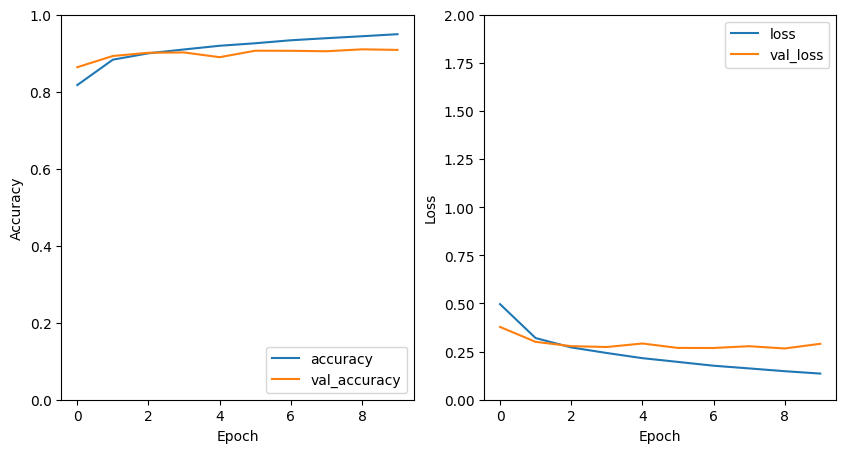

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

# Load the Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)

print("\nTest accuracy on Fashion-MNIST:", test_acc)

# Plot training history
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend(loc='upper right')

plt.show()